### Introdução


Iris dataset nos fornece a medida em centimetros das larguras e comprimentos da sépala e da pétala de 50 flores de três espécies de Iris. Nosso objetivo é predizer a espécie a partir de tais observações.

### 1) Importando o dataset

In [261]:
data(iris)
flores=data.frame(iris)

### 2) Obtendo estatísticas descritivas de cada um dos parâmetros:

In [262]:
summary(flores)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### 3) Tratando os dados

In [263]:
normaliza <-function(x) {(x-min(x))/(max(x)-min(x))}

flores_normalizadas=as.data.frame(lapply(iris[,c(1,2,3,4)], normaliza))

In [264]:
summary(flores_normalizadas)

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4406   Mean   :0.4675   Mean   :0.45806  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

### Separando os dados em grupo teste e grupo treino (80/20)

In [265]:
set.seed(73)

amostra <- sample(1:nrow(flores),0.8 * nrow(flores))

iris_train=flores_normalizadas[amostra,]

iris_test=flores_normalizadas[-amostra,]

### Usando a Cross-Validation para achar o melhor hiperparâmetro

O modelo de machine learning que utilizaremos é o k-NN, onde nosso objetivo é prever a espécie da flor Iris a partir dos demais parâmetros. A 'regra de bolso' do k-NN segundo nosso livro texto seria usar $k=N^.5$, que no caso seria aproximadamente 13

In [266]:
#Como ao longo do modelo criamos uma matriz para ter uma melhor visualização
#da classificação dos nossos dados, nossa percentagem de acerto é dada pelo dessa matriz dividido pela soma total

precisao <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}

In [267]:
#Aqui rodamos a 10-fold Cross validation para o parâmetro k do nosso modelo num intervalo de 1:57 com passo 4; estes valores 
# bem elevados foram propositais para visualizar o que acontece para uma vasta gama de Ks


Erro_cv=list()
Erro_fold=list()

for(j in (seq(1,57,by=4))){
    for(i in 1:10){
        amostracv=as.integer(nrow(flores)*(i-1)/10+1):as.integer(nrow(flores)/10*i)
        treino=flores_normalizadas[-amostracv,]
        teste=flores_normalizadas[amostracv,]
        iris_target_category <- flores[-amostracv,5]
        iris_test_category <- flores[amostracv,5]
        modelo=knn(treino,teste,cl=iris_target_category,k=j)
        tabela <- table(modelo,iris_test_category)  #aqui criamos uma maneira de visualizar como nosso modelo classificou os dados
        Erro_fold=c(Erro_fold,precisao(tabela))       
    }
    Erro_fold=unlist(Erro_fold)
    Erro_cv=c(Erro_cv,mean(Erro_fold))
    Erro_fold=list()              
}

Erro_cv=unlist(Erro_cv)

In [268]:
Erro_cv

[1] 94.66667 95.33333 94.00000 94.00000 95.33333 92.66667 92.00000 92.00000
 [9] 90.00000 89.33333 88.66667 87.33333 86.66667 85.33333 83.33333

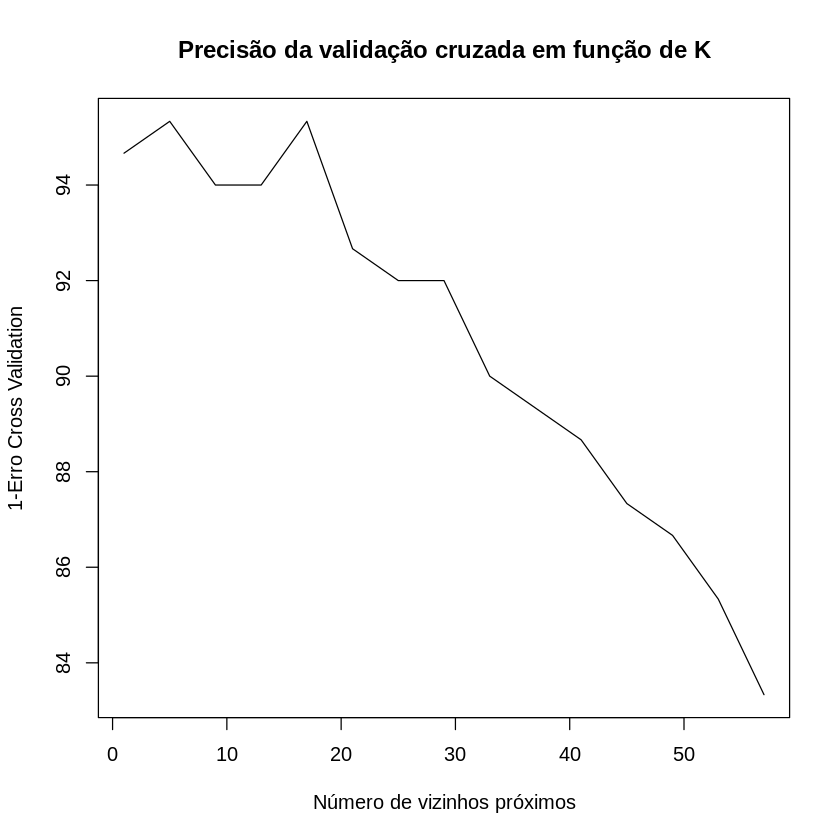

In [269]:
k=seq(1,57,by=4)
plot(k,Erro_cv,type='l',main='Precisão da validação cruzada em função de K',ylab='1-Erro Cross Validation',xlab='Número de vizinhos próximos')

 Como podemos verificar, o valor mais alto de acurácia se dá para o parâmetro k=17.

In [270]:
Erro_cv[5]

[1] 95.33333

 A "regra de bolso" funciona bem, dado que temos uma alta precisão para k=13, e notamos uma grande queda de precisão conforme o k aumenta, conforme prevíamos devido ao Overfit

### Utilizando o k determinado pela Cross Validation para rodarmos o nosso modelo

In [271]:
iris_target_category <- iris[amostra,5]
iris_test_category <- iris[-amostra,5]

modelo=knn(iris_train,iris_test,cl=iris_target_category,k=17)

tabela=table(modelo,iris_test_category)

tabela

            iris_test_category
modelo       setosa versicolor virginica
  setosa         14          0         0
  versicolor      0          5         2
  virginica       0          0         9

In [272]:
precisao(tabela)

[1] 93.33333

### A partir dos resultados podemos inferir que o modelo K-NN é um ótimo modelo para a predição de espécies da flor Iris, o que indica, que mesmo não conhecendo a planta, provalvemente seríamos capazes de identificar duas espécies diferentes se nos fossem amostradas pois nosso modelo indica que a diferença de tamanho entre duas espécies é significativa